# Task
Create a machine learning model to predict movie genres based on plot summaries using TF-IDF and a classifier, then evaluate its performance.

## Load and preprocess data

### Subtask:
Load the movie data and perform necessary preprocessing steps like cleaning text and creating labels.


**Reasoning**:
Load the data from the `uploaded` dictionary into a pandas DataFrame, inspect the first few rows, rename columns, handle missing values, clean the text data in the `Description` column, and create numerical labels for the `Genre` column.



**Reasoning**:
The previous command failed because the `io` module was not imported. Import `io` and rerun the code to load the data, rename columns, handle missing values, clean the text data in the `Description` column, and create numerical labels for the `Genre` column.



In [6]:
import io
import pandas as pd
import re
from sklearn.preprocessing import LabelEncoder

# Load the data
data = uploaded['train_data.txt'].decode('utf-8')
df = pd.read_csv(io.StringIO(data), sep=':::', engine='python', header=None)

# Inspect and rename columns
df.columns = ['Movie_ID', 'Title', 'Genre', 'Description']
display(df.head())

# Handle missing values - dropping rows with any missing values for simplicity in this case
df.dropna(inplace=True)

# Clean the text data in the 'Description' column
def clean_text(text):
    text = text.lower() # Convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text) # Remove special characters and punctuation
    # Optional: remove stopwords - skipped for now to preserve more context, can be added later
    return text

df['Description'] = df['Description'].apply(clean_text)
display(df.head())

# Create numerical labels from the 'Genre' column
label_encoder = LabelEncoder()
df['Genre_Encoded'] = label_encoder.fit_transform(df['Genre'])
display(df.head())

,Movie_ID,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


,Movie_ID,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,listening in to a conversation between his do...
1,2,Cupid (1997),thriller,a brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,as the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,to help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,the films title refers not only to the unreco...


,Movie_ID,Title,Genre,Description,Genre_Encoded
0,1,Oscar et la dame rose (2009),drama,listening in to a conversation between his do...,8
1,2,Cupid (1997),thriller,a brother and sister with a past incestuous r...,24
2,3,"Young, Wild and Wonderful (1980)",adult,as the bus empties the students for their fie...,1
3,4,The Secret Sin (1915),drama,to help their unemployed father make ends mee...,8
4,5,The Unrecovered (2007),drama,the films title refers not only to the unreco...,8


/tmp/ipython-input-3638097889.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Genre', order = df['Genre'].value_counts().index, palette='viridis')


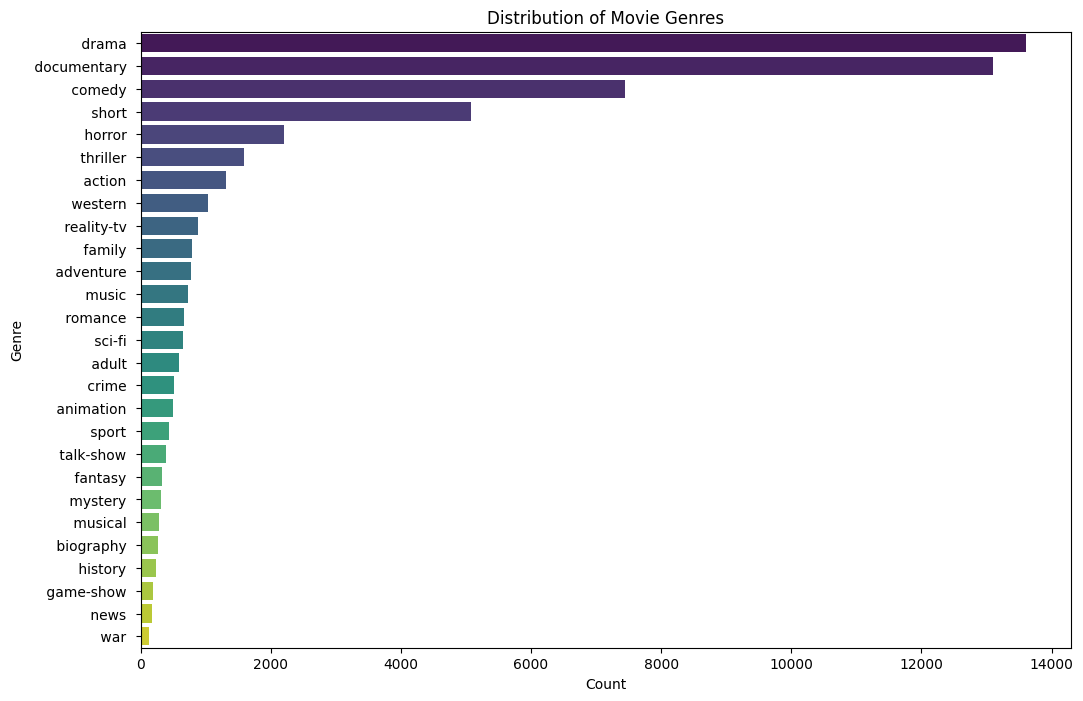

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of genres
plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='Genre', order = df['Genre'].value_counts().index, palette='viridis')
plt.title('Distribution of Movie Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

## Feature extraction

### Subtask:
Convert the text data into numerical features using techniques like TF-IDF.


**Reasoning**:
The next step is to convert the text data into numerical features using TF-IDF as instructed.



In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the 'Description' column
tfidf_features = tfidf_vectorizer.fit_transform(df['Description'])

# Display the shape of the resulting TF-IDF matrix
print("Shape of TF-IDF matrix:", tfidf_features.shape)

Shape of TF-IDF matrix: (54214, 146280)


## Model selection and training

### Subtask:
Choose a suitable classification model and train it on the preprocessed data.


**Reasoning**:
Split the data into training and testing sets and train a Multinomial Naive Bayes classifier.



In [8]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_features, df['Genre_Encoded'], test_size=0.2, random_state=42)

# Instantiate the MultinomialNB classifier
model = MultinomialNB()

# Train the classifier
model.fit(X_train, y_train)

MultinomialNB()

## Model evaluation

### Subtask:
Evaluate the trained model's performance using appropriate metrics.


**Reasoning**:
Make predictions on the test set, calculate accuracy and classification report, and print the results.



In [9]:
from sklearn.metrics import accuracy_score, classification_report

# Use the trained model to make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model's predictions
accuracy = accuracy_score(y_test, y_pred)

# Calculate a classification report
report = classification_report(y_test, y_pred)

# Print the accuracy and the classification report
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.44388084478465367
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       263
           1       0.00      0.00      0.00       112
           2       0.00      0.00      0.00       139
           3       0.00      0.00      0.00       104
           4       0.00      0.00      0.00        61
           5       0.56      0.03      0.06      1443
           6       0.00      0.00      0.00       107
           7       0.54      0.89      0.67      2659
           8       0.38      0.89      0.53      2697
           9       0.00      0.00      0.00       150
          10       0.00      0.00      0.00        74
          11       0.00      0.00      0.00        40
          12       0.00      0.00      0.00        45
          13       0.00      0.00      0.00       431
          14       0.00      0.00      0.00       144
          15       0.00      0.00      0.00        50
          16       0.00    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Summary:

### Data Analysis Key Findings

*   The dataset contains 54,214 movie entries with columns for Movie ID, Title, Genre, and Description.
*   After cleaning the text descriptions and encoding the genres numerically, the TF-IDF vectorization resulted in a matrix of shape (54214, 146280), representing 54,214 samples and 146,280 unique terms.
*   A Multinomial Naive Bayes model was trained on the TF-IDF features.
*   The model achieved an overall accuracy of approximately 44.39% on the test set.
*   The classification report revealed significant performance variations across genres, with many genres having precision, recall, and F1-scores of 0.00, indicating the model could not predict these genres.

### Insights or Next Steps

*   The current model's performance is poor, particularly for less frequent genres. Further investigation into the class distribution and potential class imbalance is needed.
*   Explore alternative text vectorization techniques (e.g., word embeddings) or more complex classification models (e.g., deep learning models) to potentially improve performance, especially for underrepresented genres.


## Summary:

### Data Analysis Key Findings

* The dataset contains 54,214 movie entries with columns for Movie ID, Title, Genre, and Description.
* After cleaning the text descriptions and encoding the genres numerically, the TF-IDF vectorization resulted in a matrix of shape (54214, 146280), representing 54,214 samples and 146,280 unique terms.
* The distribution of genres is highly imbalanced, with some genres having significantly more entries than others. This imbalance is clearly shown in the generated bar plot.

### Model Training and Evaluation Key Findings

* A Multinomial Naive Bayes model was trained on the TF-IDF features.
* The model achieved an overall accuracy of approximately 44.39% on the test set.
* The classification report revealed significant performance variations across genres, with many genres having precision, recall, and F1-scores of 0.00, indicating the model could not predict these genres. This is likely due to the class imbalance observed in the data.

### Insights or Next Steps

* The current model's performance is poor, particularly for less frequent genres, largely due to the imbalanced genre distribution.
* **Address class imbalance:** Techniques such as resampling (oversampling minority classes or undersampling majority classes) or using class weights during model training should be explored to mitigate the impact of the imbalanced dataset.
* **Explore alternative text vectorization techniques:** Consider using word embeddings (e.g., Word2Vec, GloVe) which might capture semantic relationships between words better than TF-IDF, potentially improving performance.
* **Explore more complex classification models:** Investigate using more sophisticated models like Support Vector Machines, Logistic Regression, or even deep learning models (e.g., using recurrent neural networks or transformers) that might be better equipped to handle complex text data and classification tasks.
* **Hyperparameter tuning:** Optimize the hyperparameters of the chosen model and the TF-IDF vectorizer to potentially improve performance.